## **Google Stock Time Series Forecating Using Machine Learning**

###**Description**

The historical stock price information is also publicly available. For our current use case, we will utilize the pandas_datareader library to get the required S&P 500 index history using Yahoo Finance databases. We utilize the closing price information from the dataset available through other information such as opening price, adjusted closing price, etc., are also available.

Here's a brief description of each column:
1.	Date: The date of the recorded financial data.
2.	High: The highest price of the financial asset (e.g., stock) during the given date.
3.	Low: The lowest price of the financial asset during the given date.
4.	Open: The opening price of the financial asset at the beginning of the given date.
5.	Close: The closing price of the financial asset at the end of the given date.
6.	Volume: The trading volume or the number of shares/contracts traded during the given date.
7.	Adj Close: The adjusted closing price of the financial asset at the end of the given date. Adjusted closing prices take into account factors such as dividends and stock splits.




With the financial dataset containing daily price movements and trading volumes of a financial asset, there are several potential analyses and tasks that you can perform. Here are some common financial analysis and research areas that can be explored with this dataset:

1. Technical Analysis: Use technical indicators and chart patterns to analyze price movements and identify potential buy/sell signals.
2. Trend Identification: Determine the overall trend of the financial asset over time (e.g., uptrend, downtrend, sideways).
3. Volatility Assessment: Measure the volatility of the financial asset to understand its price fluctuations.
4. Correlation Analysis: Explore correlations between this financial asset and other related assets or market indices.
5. Moving Average Crossover Strategy: Implement a simple trading strategy using moving average crossovers.
6. Seasonal Analysis: Analyze seasonal patterns in the financial asset's price movements.
7. Risk Management: Calculate risk metrics like Value at Risk (VaR) to assess potential losses under adverse market conditions.
8. Forecasting: Use time series forecasting models to predict future price movements of the financial asset.
9. Trading Volume Analysis: Analyze trading volume patterns to understand market interest and liquidity.
10. Price Returns: Calculate daily, weekly, or monthly price returns to measure the asset's performance.

11. Market Sentiment Analysis: Use news sentiment analysis to understand how news events affect the financial asset's price.
12. Market Index Comparison: Compare the performance of the financial asset with relevant market indices.
13. Market Efficiency: Test the efficiency of the market for this financial asset (e.g., random walk hypothesis).
14. Liquidity Analysis: Assess the liquidity of the financial asset based on trading volumes and spreads.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science - GT/Machine Learning/EDA -- Practise/Datasets/Google_Stock_Train (2010-2022).csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028
...,...,...,...,...,...,...,...
3267,2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000
3268,2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300
3269,2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200
3270,2022-12-29,86.620003,88.849998,86.610001,88.449997,88.449997,23333500


In [ ]:
df.drop(df.index[2800:], inplace=True)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028
...,...,...,...,...,...,...,...
2795,2021-02-10,104.156998,104.944000,102.612000,104.323997,104.323997,25102000
2796,2021-02-11,104.550003,104.699997,103.443001,104.437500,104.437500,20480000
2797,2021-02-12,103.988503,104.974998,103.678497,104.751503,104.751503,18990000
2798,2021-02-16,104.587502,107.257004,104.587502,105.535004,105.535004,31004000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3272 non-null   object 
 1   Open       3272 non-null   float64
 2   High       3272 non-null   float64
 3   Low        3272 non-null   float64
 4   Close      3272 non-null   float64
 5   Adj Close  3272 non-null   float64
 6   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.1+ KB


In [ ]:
# Assuming df is already created and you want to check its structure
print(df.columns)  # Check the existing columns

# Strip whitespace from column names if necessary
df.columns = df.columns.str.strip()

# Convert 'Date' column to datetime format
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
else:
    print("Column 'Date' does not exist in the DataFrame.")

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3272 non-null   datetime64[ns]
 1   Open       3272 non-null   float64       
 2   High       3272 non-null   float64       
 3   Low        3272 non-null   float64       
 4   Close      3272 non-null   float64       
 5   Adj Close  3272 non-null   float64       
 6   Volume     3272 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 179.1 KB


In [ ]:
df.columns = ["date","open", "high", "low", "close", "adj_close","volume"]
df

,date,open,high,low,close,adj_close,volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028
...,...,...,...,...,...,...,...
3267,2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000
3268,2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300
3269,2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200
3270,2022-12-29,86.620003,88.849998,86.610001,88.449997,88.449997,23333500


<Axes: >

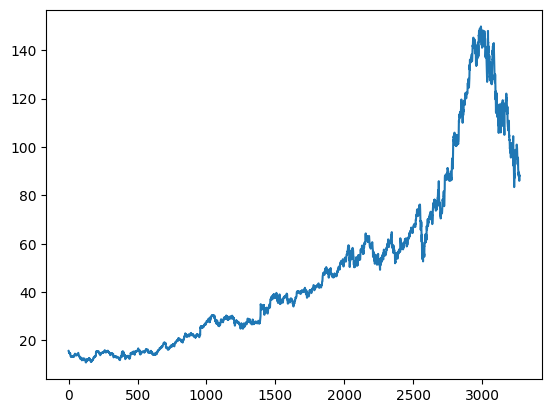

In [ ]:
df["close"].plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['close'])
result

(-0.630788131705103,
 0.8638723239459678,
 22,
 3249,
 {'1%': -3.4323643041051666,
  '5%': -2.862429999065346,
  '10%': -2.5672437656428793},
 9964.939753649425)

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(close):
    result=adfuller(close)
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(df['close'])

ADF Test Statistic : 2.039586574605404
p-value : 0.9987222330900135
Lags Used : 26
Number of Observations Used : 2773
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
df['close First Difference'] = df['close'] - df['close'].shift(1)

In [ ]:
df.head()

,date,open,high,low,close,adj_close,volume,close First Difference
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752,NaN
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812,-0.069069
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852,-0.393643
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428,-0.354355
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028,0.198199


In [ ]:
adfuller_test(df['close First Difference'].dropna())

ADF Test Statistic : -13.143871907569626
p-value : 1.411261845720506e-24
Lags Used : 21
Number of Observations Used : 3249
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: >

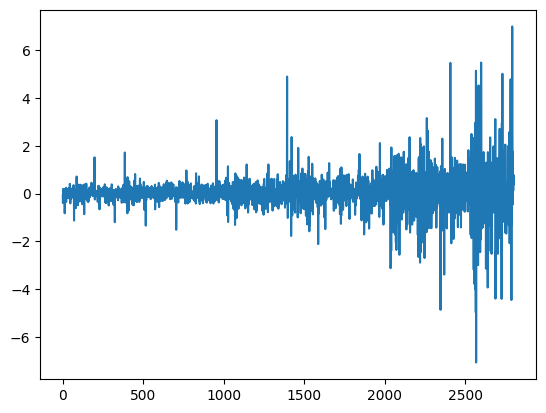

In [ ]:
df['close First Difference'].plot()

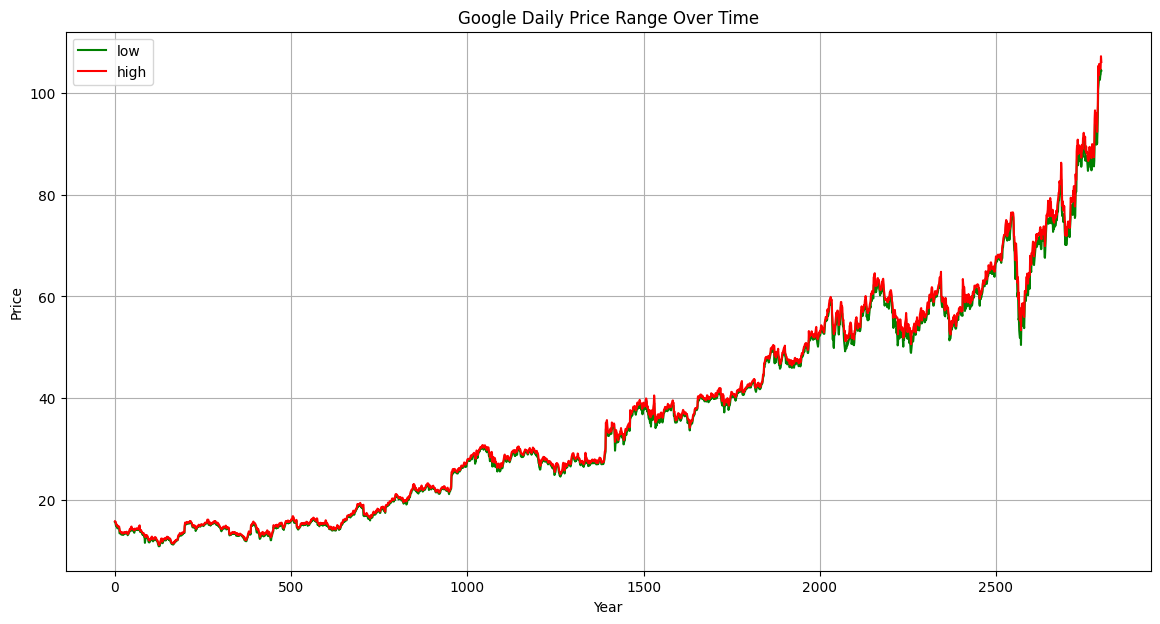

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['low'], color = 'g', label= 'low')
plt.plot(df['high'], color= 'r', label = 'high')
plt.title('Google Daily Price Range Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

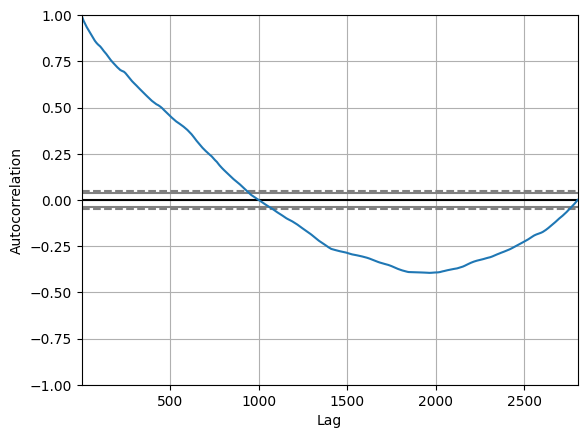

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['close'])
plt.show()

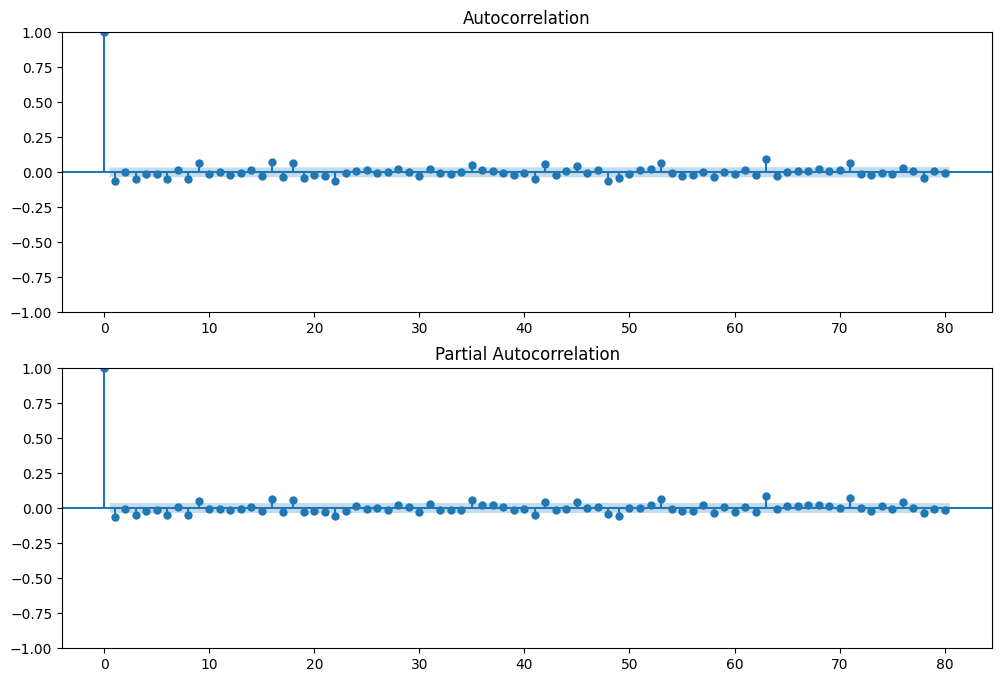

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['close First Difference'].dropna(),lags=80,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['close First Difference'].dropna(),lags=80,ax=ax2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(df['close'], order=(1, 1, 1))
model_fit = model.fit()

In [ ]:
start = 1
end = len(df) - 1

forecast = model_fit.predict(start=start, end=end, typ='levels')

df['Forecast'] = forecast

In [ ]:
# Drop NaN values from actual and forecasted data
actual_close = df['close'].iloc[1:]  # Removing the first NaN caused by differencing
forecast_close = df['Forecast'].dropna()  # Removing any NaN from forecast

# Ensure both series are aligned
actual_close, forecast_close = actual_close.align(forecast_close, join='inner')

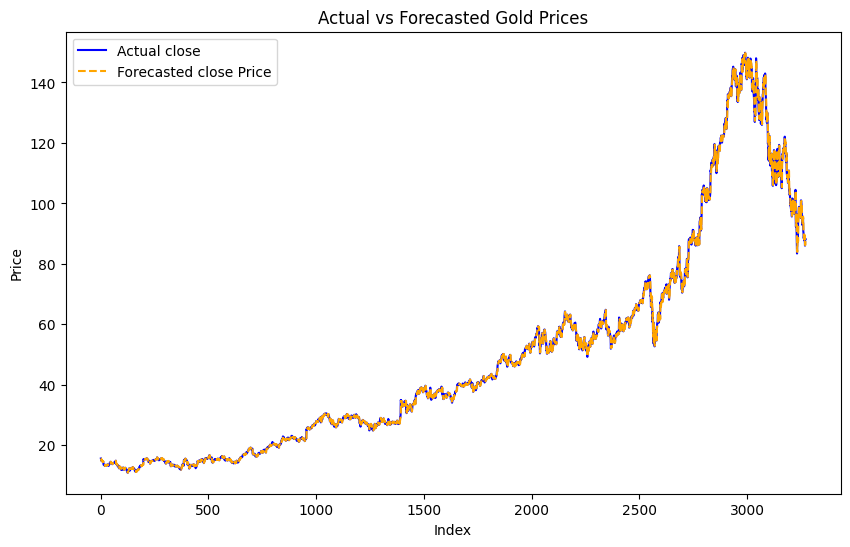

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(actual_close, label='Actual close', color='blue')
plt.plot(forecast_close, label='Forecasted close Price', color='orange', linestyle='--')
plt.title('Actual vs Forecasted Gold Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
mse = mean_squared_error(actual_close, forecast_close)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 1.12566748744317


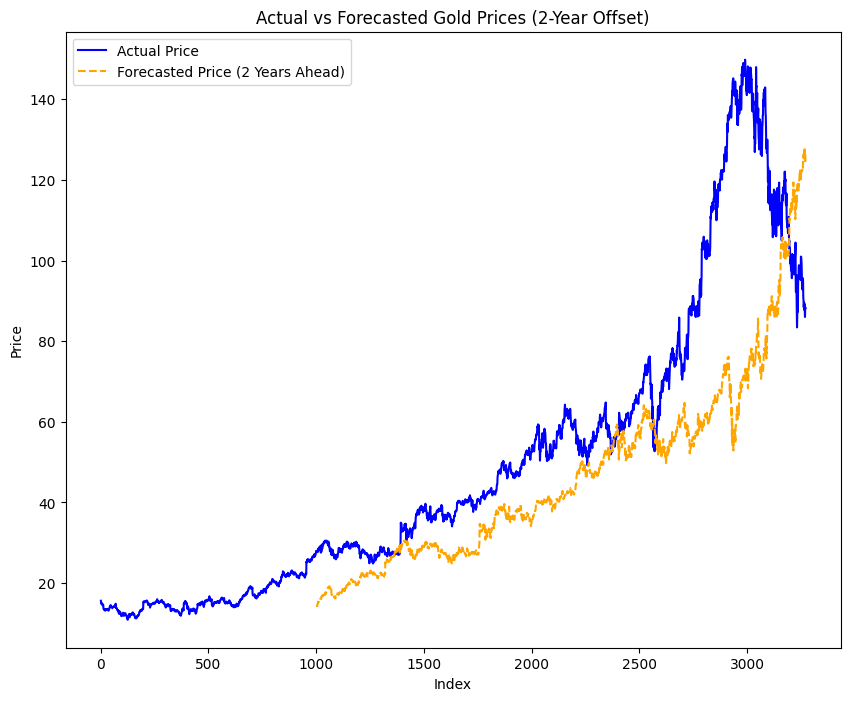

In [ ]:
offset = 365
forecast_close_shifted = forecast_close.shift(offset)

plt.figure(figsize=(10, 8))
plt.plot(actual_close, label='Actual Price', color='blue')
plt.plot(forecast_close_shifted[1000:3271], label='Forecasted Price (2 Years Ahead)', color='orange', linestyle='--')

plt.title('Actual vs Forecasted Gold Prices (2-Year Offset)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()


# **Conclusion**

# CONCLUSION:

In this ARIMA (AutoRegressive Integrated Moving Average) model, we've opted for the parameters (1,1,1) for a dataset's 'close' values. This configuration implies one lag term, one difference to make the series stationary, and one moving average term. By fitting the model to your data and generating forecasts for specified time frames, it’s possible to compare these predictions with actual sales figures. The results, visualized in your plot, offer a means to evaluate the model's effectiveness in capturing the data's underlying patterns. If the forecast aligns closely with actual data points, it demonstrates the model's robustness; significant deviations might suggest a need for parameter adjustments or an alternative model.so,we conclude the arima model is fit for the Google Stock data set....
